In [1]:
import pickle
import math
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean, variance, stdev

In [2]:
def truncate(f, n):
    return math.floor(f * 10 ** n) / 10 ** n

In [3]:
pat = re.compile(r"\s+")
f = open("/home/andrea/pythiaEvents/Pythia8Results.dat", 'r')

In [5]:
g = list(zip(*[ pat.sub(" ",x.strip()).split() for x in f]))

In [6]:
npart = np.array([ int(x) for x in g[0]])
sph = np.array([ float(x) for x in g[1]]) #thrust calculated using sphericity as seed axis
thr = np.array([ float(x) for x in g[2]])

In [4]:
pat2 = re.compile(r"\s+")
fd = open("/home/andrea/pythiaEvents/DWaveResults.dat", 'r')

In [13]:
g2 = list(zip(*[ pat2.sub(" ",x.strip()).split() for x in fd]))

In [14]:
dw = np.array([ float(x) for x in g2[0]])
sa = np.array([ float(x) for x in g2[1]])

In [47]:
dw

array([0.98728502, 0.98020835, 0.63918028, 0.90488616, 0.94331982,
       0.9529264 , 0.96758538, 0.8683957 , 0.97833794, 0.98642783,
       0.88426551, 0.93775851, 0.90759322, 0.95971425, 0.98505993,
       0.96485068, 0.97944747, 0.94436544, 0.86373211, 0.51885863,
       0.9783259 , 0.95557405, 0.96281335, 0.9823788 , 0.95052369,
       0.96764875, 0.78568107, 0.80674286, 0.8739139 , 0.9641281 ,
       0.95757034, 0.93797348, 0.97344363, 0.82944938, 0.93139009,
       0.95814429, 0.73634062, 0.95561956, 0.71104377, 0.94650439,
       0.89484627, 0.92494554, 0.87620473, 0.96456362, 0.88865427,
       0.9026498 , 0.93071226, 0.90902891, 0.9510676 , 0.9130901 ,
       0.95564078, 0.9753132 , 0.98057434, 0.93180921, 0.94402993,
       0.94304186, 0.97492981, 0.92867955, 0.91314834, 0.87627393,
       0.91977163, 0.9001344 , 0.91401944, 0.98138573, 0.92323762,
       0.96632748, 0.94048582, 0.87239416, 0.92342709, 0.85637618,
       0.86517138, 0.54969225, 0.96700706, 0.93483149, 0.91394

In [33]:
for i in range(len(sa)):
    if(truncate(sa[i],6)>thr[i]):
        print(truncate(sa[i],6), thr[i], npart[i])
    #diff = 100.*(sa[i] - thr[i])/thr[i]
    #if(diff > 1.0):
    #    print(npart[i],i, diff)

0.952926 0.950103 57
0.888737 0.879263 60
0.961181 0.950965 47
0.868917 0.866095 59
0.902364 0.899061 52
0.968471 0.962245 39
0.920529 0.916002 64
0.942501 0.938594 49
0.919452 0.915987 66
0.948387 0.944606 44
0.969135 0.965913 42
0.981899 0.981603 25
0.97081 0.958118 53
0.953983 0.948469 37
0.977045 0.974232 35
0.928855 0.923012 61
0.780797 0.780114 73
0.978665 0.978183 35
0.871569 0.846382 83
0.973763 0.973683 45
0.95219 0.943311 40
0.969782 0.969776 38
0.884972 0.871462 54
0.951301 0.946504 49
0.956112 0.954064 51
0.987935 0.983901 30
0.93414 0.931128 34
0.982008 0.981806 29
0.928975 0.926849 50
0.96527 0.95313 36
0.961311 0.95884 36
0.928134 0.910917 58
0.93535 0.924864 58
0.930377 0.929683 54
0.911217 0.901767 57
0.921731 0.921583 52
0.863009 0.857308 52
0.955291 0.954956 49
0.978613 0.978279 48
0.949416 0.942949 44
0.906009 0.905533 58
0.982038 0.981261 38
0.969112 0.966243 41
0.980815 0.979352 35
0.931378 0.924147 54
0.935784 0.935282 59
0.846514 0.845424 44
0.963402 0.96225 45


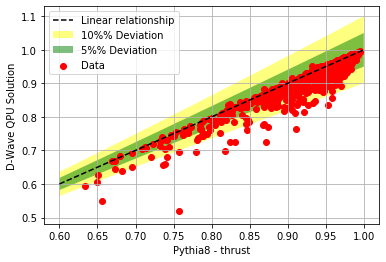

In [63]:
fig, ax = plt.subplots()
x_data = np.linspace(0.6, 1.0, 10)

a = list(zip(x_data, x_data))
sigma = 0.1

lower_bound = []
upper_bound = []
lower_bound5 = []
upper_bound5 = []

for i in range(len(x_data)):
    lower_bound.append(x_data[i]*(1-sigma*x_data[i]))
    upper_bound.append(x_data[i]*(1+sigma*x_data[i]))
    lower_bound5.append(x_data[i]*(1-0.05*x_data[i]))
    upper_bound5.append(x_data[i]*(1+0.05*x_data[i]))

ax.grid()
ax.fill_between(x_data, lower_bound, upper_bound, facecolor='yellow', alpha=0.5,label='10%% Deviation')
ax.fill_between(x_data, lower_bound5, upper_bound5, facecolor='green', alpha=0.5,label='5%% Deviation')
ax.plot(x_data,x_data, color='black', ls='--', label='Linear relationship')
ax.scatter(thr, dw, color='red', label='Data')
#plt.plot(x_data, lower_bound, color='black',ls='--')
ax.set_xlabel('Pythia8 - thrust')
ax.set_ylabel('D-Wave QPU Solution')
ax.legend(loc='upper left')

plt.savefig('plots/DWave1k.png')
plt.show()


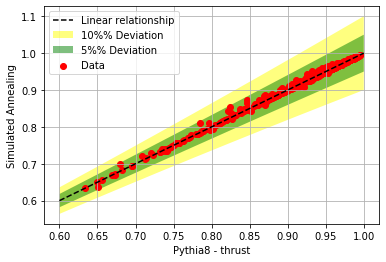

In [64]:
fig, ax = plt.subplots()
x_data = np.linspace(0.6, 1.0, 10)

a = list(zip(x_data, x_data))
sigma = 0.1

lower_bound = []
upper_bound = []
lower_bound5 = []
upper_bound5 = []

for i in range(len(x_data)):
    lower_bound.append(x_data[i]*(1-sigma*x_data[i]))
    upper_bound.append(x_data[i]*(1+sigma*x_data[i]))
    lower_bound5.append(x_data[i]*(1-0.05*x_data[i]))
    upper_bound5.append(x_data[i]*(1+0.05*x_data[i]))

ax.grid()
ax.fill_between(x_data, lower_bound, upper_bound, facecolor='yellow', alpha=0.5,label='10%% Deviation')
ax.fill_between(x_data, lower_bound5, upper_bound5, facecolor='green', alpha=0.5,label='5%% Deviation')
ax.plot(x_data,x_data, color='black', ls='--', label='Linear relationship')
ax.scatter(thr, sa, color='red', label='Data')
#plt.plot(x_data, lower_bound, color='black',ls='--')
ax.set_xlabel('Pythia8 - thrust')
ax.set_ylabel('Simulated Annealing')
ax.legend(loc='upper left')

plt.savefig('plots/SA.png')
plt.show()


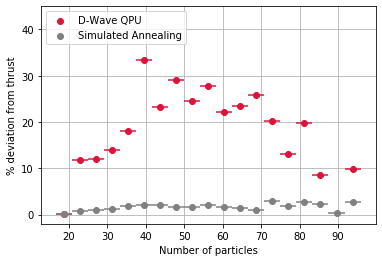

In [46]:
from scipy.stats import binned_statistic

diff_sa = []
diff_dw = []
nbins = 18

for i in range(len(dw)):
    if(truncate(sa[i],6)>thr[i]):
        diff_sa.append(100.*((1.0 - thr[i]) - (1.0 - truncate(sa[i],6)))/ (1.0 - thr[i]))
    else:
        diff_sa.append(100.*(-1.0*(1.0 - thr[i]) + (1.0 - truncate(sa[i],6)))/ (1.0 - thr[i]))
    diff_dw.append(100.*((1.0 - dw[i]) - (1.0 - thr[i]) )/(1.0 - thr[i]))

fig, ax = plt.subplots()
#ax.scatter(npart, diff_dw, s=9)

s, edges, _ = binned_statistic(npart, diff_dw, statistic='mean', bins=np.linspace(0,100, 25))

s2, edges2, _ = binned_statistic(npart, diff_sa, statistic='mean', bins=np.linspace(0,100, 25))

ys = np.repeat(s,2)
xs = np.repeat(edges,2)[1:-1]
ax.hlines(s,edges[:-1],edges[1:], color="crimson", )

ys2 = np.repeat(s2,2)
xs2 = np.repeat(edges2,2)[1:-1]
ax.hlines(s2,edges2[:-1],edges2[1:], color="gray", )

ax.scatter(edges[:-1]+np.diff(edges)/2, s, c="crimson", zorder=3, label='D-Wave QPU')
ax.scatter(edges2[:-1]+np.diff(edges2)/2, s2, c="gray", zorder=3, label='Simulated Annealing')

ax.set_xlabel('Number of particles')
ax.set_ylabel('% deviation from thrust')
ax.legend(loc='upper left')

plt.grid()
plt.ylim([-2,45])
plt.savefig('plots/SADW_vs_npart_2.png')
plt.show()


In [7]:
pat3 = re.compile(r"\s+")
fq = open("/home/andrea/pythiaEvents/qbsolvResults.dat")
g3 = list(zip(*[ pat3.sub(" ",x.strip()).split() for x in fq]))
qb = np.array([ float(x) for x in g3[0]])

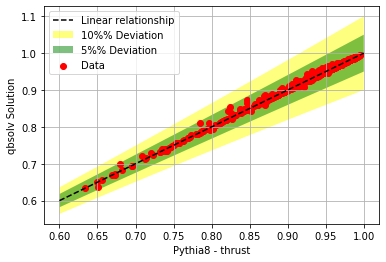

In [10]:
fig, ax = plt.subplots()
x_data = np.linspace(0.6, 1.0, 10)

a = list(zip(x_data, x_data))
sigma = 0.1

lower_bound = []
upper_bound = []
lower_bound5 = []
upper_bound5 = []

for i in range(len(x_data)):
    lower_bound.append(x_data[i]*(1-sigma*x_data[i]))
    upper_bound.append(x_data[i]*(1+sigma*x_data[i]))
    lower_bound5.append(x_data[i]*(1-0.05*x_data[i]))
    upper_bound5.append(x_data[i]*(1+0.05*x_data[i]))

ax.grid()
ax.fill_between(x_data, lower_bound, upper_bound, facecolor='yellow', alpha=0.5,label='10%% Deviation')
ax.fill_between(x_data, lower_bound5, upper_bound5, facecolor='green', alpha=0.5,label='5%% Deviation')
ax.plot(x_data,x_data, color='black', ls='--', label='Linear relationship')
ax.scatter(thr, qb, color='red', label='Data')
#plt.plot(x_data, lower_bound, color='black',ls='--')
ax.set_xlabel('Pythia8 - thrust')
ax.set_ylabel('qbsolv Solution')
ax.legend(loc='upper left')

plt.savefig('plots/qbsolv1k.png')
plt.show()

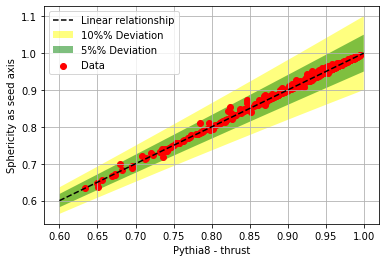

In [20]:
fig, ax = plt.subplots()
x_data = np.linspace(0.6, 1.0, 10)

a = list(zip(x_data, x_data))
sigma = 0.1

lower_bound = []
upper_bound = []
lower_bound5 = []
upper_bound5 = []

for i in range(len(x_data)):
    lower_bound.append(x_data[i]*(1-sigma*x_data[i]))
    upper_bound.append(x_data[i]*(1+sigma*x_data[i]))
    lower_bound5.append(x_data[i]*(1-0.05*x_data[i]))
    upper_bound5.append(x_data[i]*(1+0.05*x_data[i]))

ax.grid()
ax.fill_between(x_data, lower_bound, upper_bound, facecolor='yellow', alpha=0.5,label='10%% Deviation')
ax.fill_between(x_data, lower_bound5, upper_bound5, facecolor='green', alpha=0.5,label='5%% Deviation')
ax.plot(x_data,x_data, color='black', ls='--', label='Linear relationship')
ax.scatter(thr, sph, color='red', label='Data')
#plt.plot(x_data, lower_bound, color='black',ls='--')
ax.set_xlabel('Pythia8 - thrust')
ax.set_ylabel('Sphericity as seed axis')
ax.legend(loc='upper left')

plt.savefig('plots/sph1k.png')
plt.show()